<Axes: xlabel='PCA1', ylabel='PCA2'>

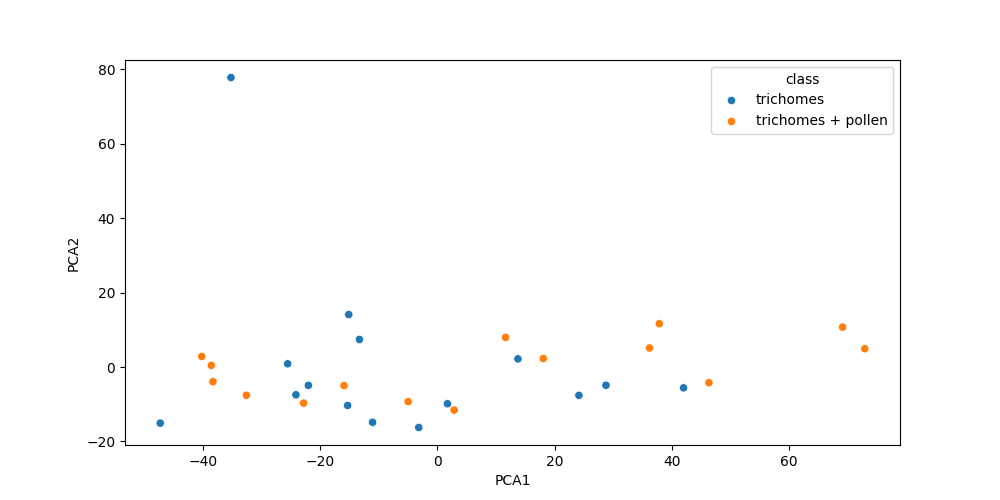

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib widget
trichomes_spectra = pd.read_csv("t_pe/protein_extract_spectra/protein_extract_32_scans.csv")
trichomes_pollen_spectra = pd.read_csv("t+p_pe/protein_extract_spectra/protein_extract_32_scans.csv")
wavenumber = pd.read_csv("wavenumber.csv",header=0)
trichomes_spectra = trichomes_spectra.T.reset_index(drop=True)
trichomes_pollen_spectra = trichomes_pollen_spectra.T.reset_index(drop=True)
trichomes_spectra.columns = wavenumber['wavenumber']
trichomes_pollen_spectra.columns = wavenumber['wavenumber']

trichomes_spectra['class'] = 'trichomes'
trichomes_pollen_spectra['class'] = 'trichomes + pollen'
main_df = pd.concat([trichomes_spectra, trichomes_pollen_spectra], axis=0, ignore_index=True)
main_df.columns.name = None
pca = PCA(n_components=2)
scaler = StandardScaler()
y = main_df.pop('class')
X = main_df
X = scaler.fit_transform(X)

import seaborn as sns
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])

pca_plot, axis = plt.subplots(1,1, figsize=(10,5))

sns.scatterplot(x=pca_df['PCA1'], y=pca_df['PCA2'], hue=y.astype(str), palette='tab10', marker='o')